In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(777)
print(tf.__version__)

2.3.0


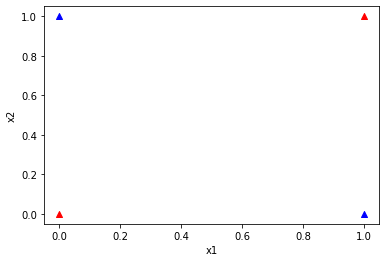

In [4]:
# data 그래프로 표현
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [5]:
# 학습시킬 데이터를 dataset에 담은 후 batch size를 정한다
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

In [12]:
# 4layer로 deep nn model을 만든다
nb_classes = 10

class wide_deep_nn():
    def __init__(self, nb_classes):
        super(wide_deep_nn, self).__init__()        
     
        self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

        self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

        self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

        self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')
        
        self.variables = [self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]
    
    # 학습 시킬 데이터 casting
    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels
    
    def deep_nn(self, features):
            layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
            layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
            layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
            hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
            return hypothesis
    # cost function
    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost
    # 0.5 기준으로 0 or 1
    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)
    
    # 학습 
    def fit(self, dataset, EPOCHS=20000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in range(EPOCHS):
            for features, labels  in dataset:
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features),features,labels)))

    # 학습된 model로 test 해보기
    def test_model(self,x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

In [13]:
# model 생성
model = wide_deep_nn(nb_classes)

# model 학습
model.fit(dataset)

# model test
model.test_model(x_data, y_data)

Iter: 0, Loss: 0.7044
Iter: 500, Loss: 0.6894
Iter: 1000, Loss: 0.6870
Iter: 1500, Loss: 0.6843
Iter: 2000, Loss: 0.6812
Iter: 2500, Loss: 0.6776
Iter: 3000, Loss: 0.6733
Iter: 3500, Loss: 0.6679
Iter: 4000, Loss: 0.6612
Iter: 4500, Loss: 0.6527
Iter: 5000, Loss: 0.6418
Iter: 5500, Loss: 0.6281
Iter: 6000, Loss: 0.6108
Iter: 6500, Loss: 0.5895
Iter: 7000, Loss: 0.5635
Iter: 7500, Loss: 0.5322
Iter: 8000, Loss: 0.4953
Iter: 8500, Loss: 0.4531
Iter: 9000, Loss: 0.4073
Iter: 9500, Loss: 0.3603
Iter: 10000, Loss: 0.3147
Iter: 10500, Loss: 0.2728
Iter: 11000, Loss: 0.2357
Iter: 11500, Loss: 0.2038
Iter: 12000, Loss: 0.1767
Iter: 12500, Loss: 0.1539
Iter: 13000, Loss: 0.1348
Iter: 13500, Loss: 0.1186
Iter: 14000, Loss: 0.1048
Iter: 14500, Loss: 0.0932
Iter: 15000, Loss: 0.0832
Iter: 15500, Loss: 0.0746
Iter: 16000, Loss: 0.0672
Iter: 16500, Loss: 0.0608
Iter: 17000, Loss: 0.0552
Iter: 17500, Loss: 0.0503
Iter: 18000, Loss: 0.0461
Iter: 18500, Loss: 0.0423
Iter: 19000, Loss: 0.0390
Iter: 1950